In [1]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import *  

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import keras_tuner
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Input
from keras.wrappers import SKLearnClassifier
import keras.utils 
from keras.callbacks import * 


SVM-Kernels

Three different types of SVM-Kernels are displayed below.
The polynomial and RBF are especially useful when the
data-points are not linearly separable.



---------------- SVC of binary class ------------------

Some properties of Classifier
-------------------------------
clf.coef_       
    Coefficients for each feature 
    only for linear problem
clf.support_
    SupportVectorIndices 
    Vector of indices that specify the rows in the training data X, 
    that were selected as support vectors 
clf.support_vectors_  
    are subset of features (rows of X) which are used for decision boundary
clf.n_support_ 
    get number of support vectors for each class

clf.decision_function
    decision function that tells us how close to the seperating line we are 
    (close to the boundary means a low-confidence decision)
    Returns (n_samples, n_classes * (n_classes-1) / 2) for ovo, 
    for ovr, the shape is (n_samples, n_classes).
    each value is proportional to the dist

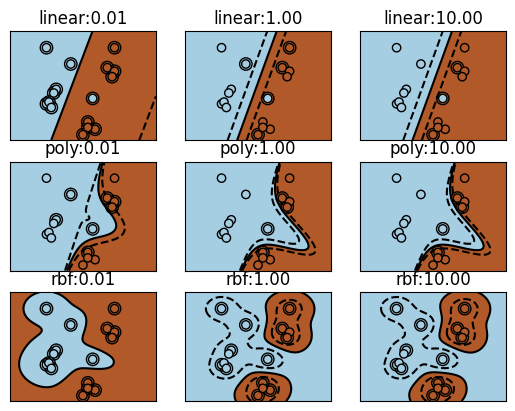

In [2]:
%run code\5.1.plot_svm_kernels.py

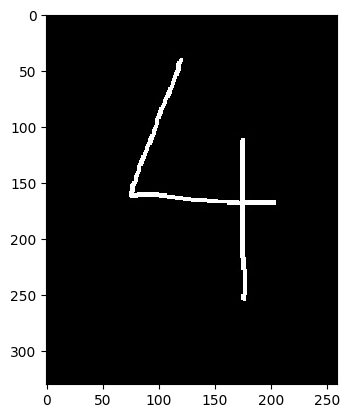

In [4]:
# Image classification using SVM
from PIL import Image
path = r"4.jpg"
im = Image.open(path).convert("L")
data = np.asarray(im)
plt.imshow(data, cmap=plt.cm.gray_r, interpolation='nearest')  #cmap = Color Map

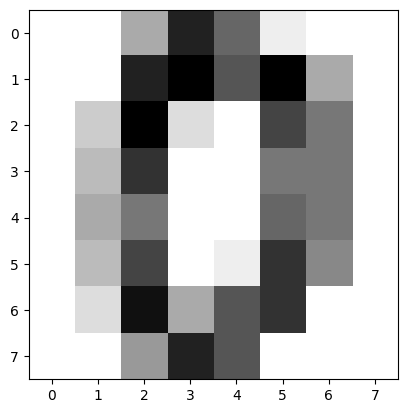

In [9]:
digits = load_digits()
X,y = digits.data, digits.target
X.shape, y.shape
plt.imshow(X[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

In [8]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [43]:
#High dimension to low dimension 
pca1 = PCA()
svm1 = SVC(kernel='rbf', gamma='scale')
pca1
pipe = Pipeline([("pca", pca1),('svm', svm1)])
params = dict( pca__n_components   = [2, 5,10,20,40,55,64] ,  #n_components
              svm__C     = [ 0.001, 0.01, 0.1, 1, 10],  # C
              svm__kernel     = ['rbf', 'poly', 'sigmoid']      #kernel 
)
#split test train, test = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#then do RandomizedSearchCV
m = RandomizedSearchCV(pipe, params, cv=5)
m.fit(X_train, y_train)
#print confusion matrix and accuracy
#for train 
print(m.best_estimator_)
print(m.score(X_train, y_train))
print(confusion_matrix(y_train, m.predict(X_train)))

#and test 
print(m.score(X_test, y_test))
print(confusion_matrix(y_test, m.predict(X_test)))

Pipeline(steps=[('pca', PCA(n_components=40)), ('svm', SVC(C=1))])
0.9987631416202845
[[168   0   0   0   0   0   0   0   0   0]
 [  0 160   0   0   0   0   0   0   0   0]
 [  0   0 157   0   0   0   0   0   0   0]
 [  0   0   0 163   0   0   0   0   0   0]
 [  0   0   0   0 169   0   0   0   0   0]
 [  0   0   0   0   0 167   0   0   0   1]
 [  0   0   0   0   0   0 164   0   0   0]
 [  0   0   0   0   0   0   0 159   0   0]
 [  0   0   0   0   0   0   0   0 152   0]
 [  0   0   0   0   0   0   0   0   1 156]]
0.9944444444444445
[[10  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  1  0  0  0 22]]


In [44]:
m.best_params_

{'svm__kernel': 'rbf', 'svm__C': 1, 'pca__n_components': 40}

In [54]:
#Our data
im.thumbnail( (8,8) )
data = np.asarray(im)
data.shape  #(8,6)
data = np.hstack( (data, np.array([255]*16).reshape(8,2)) )
data.shape
m.predict([(255-data).ravel()])

array([4])

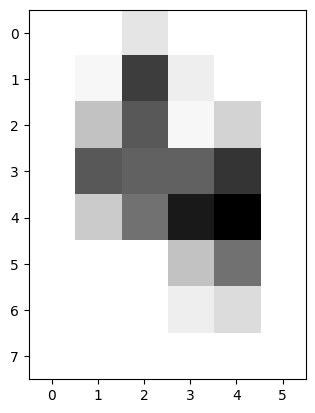

In [30]:
plt.imshow(255-np.asarray(im) , cmap=plt.cm.gray_r, interpolation='nearest')

In [42]:
svm = SVC(kernel='sigmoid', C=100)
svm.fit(X,y)
svm.predict([data.ravel()])

array([4])

In [ ]:
import os
os.environ['PATH'] = r"C:\handson\graphviz-12.2.1-win64\bin;" + os.environ['PATH']

In [ ]:
!pip install graphviz

In [45]:
%run code\6.1.decision_tree.py

------------------------ iris data DecisionTreeClassifier ---------
With entropy
check default value of all params
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Training Accuracy 1.0
Test data Accuracy 0.9736842105263158
Predicted class for test data ...
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
the probability of each class can be predicted(test data)
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 

# DT

KeyError: 'PATH'

In [48]:
%env PATH

'InstallFolder\\bin;%PATH%'

In [49]:
import os
del os.environ["PATH"]

In [50]:
%env PATH

UsageError: Environment does not have key: PATH


In [63]:
X,y,255-data
rf = RandomForestClassifier()
rf.fit(X,y)
rf.predict([(255-data).ravel()])

##do search on below 
import random
o = [ random.randint(2, 11) for _ in range(10)]
o = list(set(o))

param_dist = {"max_depth": [3, None],
              "max_features": o,
              "min_samples_split": o,
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
m = RandomizedSearchCV(rf, param_dist)
m.fit(X,y)
print(m.best_params_)
m.predict([(255-data).ravel()])

{'min_samples_split': 2, 'max_features': 2, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}


array([5])

In [59]:
##do search on below 
earlyStopping = dict(validation_fraction=0.2, n_iter_no_change=5, tol=0.01)
original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 
                    'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}
settings = {'learning_rate': 0.1, 'max_features': 2}


params = dict(original_params)
params.update(settings)
params.update(earlyStopping)

clf = GradientBoostingClassifier(**params)
clf.fit(X,y)
clf.predict([(255-data).ravel()])

#Do search of below 
parameters = {
     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[None, 3,5,8],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[100, 500, 1000]
    }

array([4])

# TPOT

In [ ]:
!pip install tpot==0.12.2

In [64]:
from tpot import TPOTClassifier
df = pd.read_csv(r"code\data\mushroom.csv")

In [69]:
df.head()
data = df.values
X_raw = data[:, 1:]
y_raw = data[:, 0]
oh = OneHotEncoder()
X = oh.fit_transform(X_raw)   #create sparse array 
X = np.asarray(X.todense())
enc = LabelEncoder()
y = enc.fit_transform(y_raw)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [71]:
#split test train, test = 0.1
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=1, population_size=10, verbosity=2) # 5 and 100 
tpot.fit(X_train, y_train)



is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


                                                                                            
Generation 1 - Current best internal CV score: 0.709620930774505
                                                                                            
Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=4, min_samples_split=4, n_estimators=100)


TPOTClassifier(generations=1, population_size=10, verbosity=2)

In [75]:
print(tpot.score(X_train, y_train), tpot.score(X_test, y_test))
tpot.export("tpot_mushroom_pipe.py")
yHat = tpot.predict(X_test)
enc.inverse_transform(yHat)
confusion_matrix(y_test, yHat)

0.7178266579120157 0.7026095519448547


array([[794, 290],
       [314, 633]], dtype=int64)

In [74]:
%pycat tpot_mushroom_pipe.py

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.709620930774505
exported_pipeline = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.9500000000000001, min_samples_leaf=4, min_samples_split=4, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


# Keras

In [78]:
# https://keras.io/

#Sequential - good API 
#Functional - Adv API
import os
os.environ["KERAS_BACKEND"] = "tensorflow"


from keras.layers import Dense, Input 
from keras.models import Sequential
data = np.array([[0,0], [0,1], [1,0], [1,1]])
target = np.array([[0],[1],[1],[0]])

#Step 
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [79]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
model.fit(data, target, epochs=100, verbose=2) # epochs - no of passes of whole data  batch_size - # of sameples at a time time 



Epoch 1/100
1/1 - 6s - 6s/step - binary_accuracy: 0.5000 - loss: 0.2633
Epoch 2/100
1/1 - 0s - 100ms/step - binary_accuracy: 0.2500 - loss: 0.2627
Epoch 3/100
1/1 - 0s - 69ms/step - binary_accuracy: 0.2500 - loss: 0.2620
Epoch 4/100
1/1 - 0s - 65ms/step - binary_accuracy: 0.2500 - loss: 0.2614
Epoch 5/100
1/1 - 0s - 65ms/step - binary_accuracy: 0.2500 - loss: 0.2608
Epoch 6/100
1/1 - 0s - 45ms/step - binary_accuracy: 0.2500 - loss: 0.2602
Epoch 7/100
1/1 - 0s - 68ms/step - binary_accuracy: 0.2500 - loss: 0.2597
Epoch 8/100
1/1 - 0s - 66ms/step - binary_accuracy: 0.2500 - loss: 0.2591
Epoch 9/100
1/1 - 0s - 47ms/step - binary_accuracy: 0.2500 - loss: 0.2586
Epoch 10/100
1/1 - 0s - 54ms/step - binary_accuracy: 0.2500 - loss: 0.2581
Epoch 11/100
1/1 - 0s - 50ms/step - binary_accuracy: 0.2500 - loss: 0.2576
Epoch 12/100
1/1 - 0s - 53ms/step - binary_accuracy: 0.5000 - loss: 0.2571
Epoch 13/100
1/1 - 0s - 66ms/step - binary_accuracy: 0.5000 - loss: 0.2566
Epoch 14/100
1/1 - 0s - 47ms/step -

In [80]:
scores = model.evaluate(data, target) #here metrics are used 

#in float64
#for binary, round it 
targetHat= model.predict(data)
rounded = [round(x[0]) for x in targetHat]
print(rounded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - binary_accuracy: 1.0000 - loss: 0.2185
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[0, 1, 1, 0]


In [81]:
import numpy as np
import os
import keras
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# x_train shape: (60000, 28, 28, 1)
# y_train shape: (60000,)
# 60000 train samples
# 10000 test samples

# Model parameters
num_classes = 10
input_shape = (28, 28, 1)  # No flattening required like scikit, 28x28 size with 1 byte for gray scale 
"""
keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")
    a convolution kernel that is convolved with the layer input over a 2D spatial
    dimension (height and width) to produce a tensor of outputs. 
        filters: int, the dimension of the output space (the number of filters in the convolution).
        kernel_size: int or tuple/list of 2 integer, specifying the size of the convolution window.
keras.layers.MaxPooling2D(pool_size=(2, 2))
    Downsamples the input along its spatial dimensions (height and width) 
    by taking the maximum value over an input window (of size defined by pool_size) 
    for each channel of the input. 
GlobalAveragePooling2D()
    Global average pooling operation for 2D data.
Dropout
    The Dropout layer randomly sets input units to 0 with a frequency of rate 
    at each step during training time, which helps prevent overfitting. 
"""
model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)


model.summary()

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)

batch_size = 128  # at a time 128 input out of input sample 
epochs = 1       # whole pass 2 times 
"""
EarlyStopping
    A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, 
    considering the min_delta and patience if applicable. 
    Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.
        min_delta: Minimum change in the monitored quantity to qualify as an improvement, 
            i.e. an absolute change of less than min_delta, will count as no improvement. 
            Defaults to 0.
        patience: Number of epochs with no improvement after which training will be stopped. 
            Defaults to 0.
"""
#checkpoint is required to start again if closed inbetween
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)
score = model.evaluate(x_test, y_test, verbose=0)

model.save("final_model.keras")
model = keras.saving.load_model("final_model.keras")
predictions = model.predict(x_test)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 260,298 (1016.79 KB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

399/399 ━━━━━━━━━━━━━━━━━━━━ 96s 229ms/step - acc: 0.5408 - loss: 1.2849 - val_acc: 0.9471 - val_loss: 0.1845
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [82]:
predictions

array([[5.9854443e-05, 3.4732195e-05, 1.9099448e-03, ..., 9.5904529e-01,
        5.4777014e-05, 3.2880228e-02],
       [5.8886071e-04, 4.2264284e-05, 9.9382061e-01, ..., 2.3182210e-05,
        7.2052630e-06, 1.8816660e-04],
       [2.4123669e-04, 9.8263437e-01, 7.4828771e-05, ..., 9.7039510e-03,
        3.5122872e-04, 5.0500652e-04],
       ...,
       [4.7338816e-07, 1.8127918e-06, 8.9118555e-07, ..., 2.1734348e-07,
        8.2680955e-08, 9.1497905e-06],
       [8.2144732e-05, 5.2219091e-09, 2.6847847e-04, ..., 1.7055987e-05,
        3.7558463e-01, 2.2655321e-02],
       [3.3012419e-03, 3.0012359e-08, 5.6634467e-02, ..., 2.1861970e-09,
        2.4326323e-03, 7.8723737e-04]], dtype=float32)

In [86]:
np.argmax(predictions, axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)